Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [13]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [14]:
# Drop NA's and dummify categorical variables
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins, columns=["year", "species", "island", "sex"]) # I am including year because I want to treat it as categorical
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year_2007,year_2008,year_2009,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,1,0,0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,1,0,0,0,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [15]:
# Model 1 (two terms: "species" and "island")
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
y = penguins["bill_depth_mm"]
X = penguins[["species_Adelie", "species_Chinstrap", "island_Biscoe", "island_Dream"]] # leave out a reference variable for each one to prevent multicollinearity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_fit = lr.fit(X_train, y_train)

y_pred_train = lr_fit.predict(X_train)
y_pred_test = lr_fit.predict(X_test)

In [16]:
# Model 2 (three terms: "bill_length_mm", "body_mass_g", and "sex")
lr2 = LinearRegression()
X2 = penguins[["bill_length_mm", "body_mass_g", "sex_male"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2)
lr2_fit = lr2.fit(X2_train, y2_train)

y2_pred_train = lr2_fit.predict(X2_train)
y2_pred_test = lr2_fit.predict(X2_test)

In [17]:
# Model 3 (five terms: island, bill_length_mm, flipper_length_mm, body_mass_g, year)
lr3 = LinearRegression()
X3 = penguins[["island_Biscoe", "island_Dream", "bill_length_mm", "flipper_length_mm", "body_mass_g", "year_2007", "year_2008"]]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)
lr3_fit = lr3.fit(X3_train, y3_train)

y3_pred_train = lr3_fit.predict(X3_train)
y3_pred_test = lr3_fit.predict(X3_test)

In [18]:
# Model 4 (all seven potential predictor terms)
lr4 = LinearRegression()
X4 = penguins[["species_Adelie", "species_Chinstrap", "island_Biscoe", "island_Dream", "bill_length_mm", "flipper_length_mm", "body_mass_g", "sex_male", "year_2007", "year_2008"]]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2)
lr4_fit = lr4.fit(X4_train, y4_train)

y4_pred_train = lr4_fit.predict(X4_train)
y4_pred_test = lr4_fit.predict(X4_test)

In [19]:
# Calculate training and test errors for each of the four models
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)

train_error2 = mean_squared_error(y2_train, y2_pred_train)
test_error2 = mean_squared_error(y2_test, y2_pred_test)

train_error3 = mean_squared_error(y3_train, y3_pred_train)
test_error3 = mean_squared_error(y3_test, y3_pred_test)

train_error4 = mean_squared_error(y4_train, y4_pred_train)
test_error4 = mean_squared_error(y4_test, y4_pred_test)

In [20]:
# Create dataframe for the visualization
errors = pd.DataFrame({"model": ["model_1", "model_2", "model_3", "model_4"],
                        "flexibility": [2, 3, 5, 7],
                        "train_mse": [train_error, train_error2, train_error3, train_error4],
                        "test_mse": [test_error, test_error2, test_error3, test_error4]})

errors.head()

,model,flexibility,train_mse,test_mse
0,model_1,2,1.274157,1.164071
1,model_2,3,1.416284,1.617607
2,model_3,5,1.956158,1.991085
3,model_4,7,0.584553,0.662613


In [21]:
# Melt data so that type of error and the errors themselves are separate columns
errors_long = errors.melt(id_vars=["model", "flexibility"], var_name="type_of_error", value_name="mse")
errors_long

,model,flexibility,type_of_error,mse
0,model_1,2,train_mse,1.274157
1,model_2,3,train_mse,1.416284
2,model_3,5,train_mse,1.956158
3,model_4,7,train_mse,0.584553
4,model_1,2,test_mse,1.164071
5,model_2,3,test_mse,1.617607
6,model_3,5,test_mse,1.991085
7,model_4,7,test_mse,0.662613


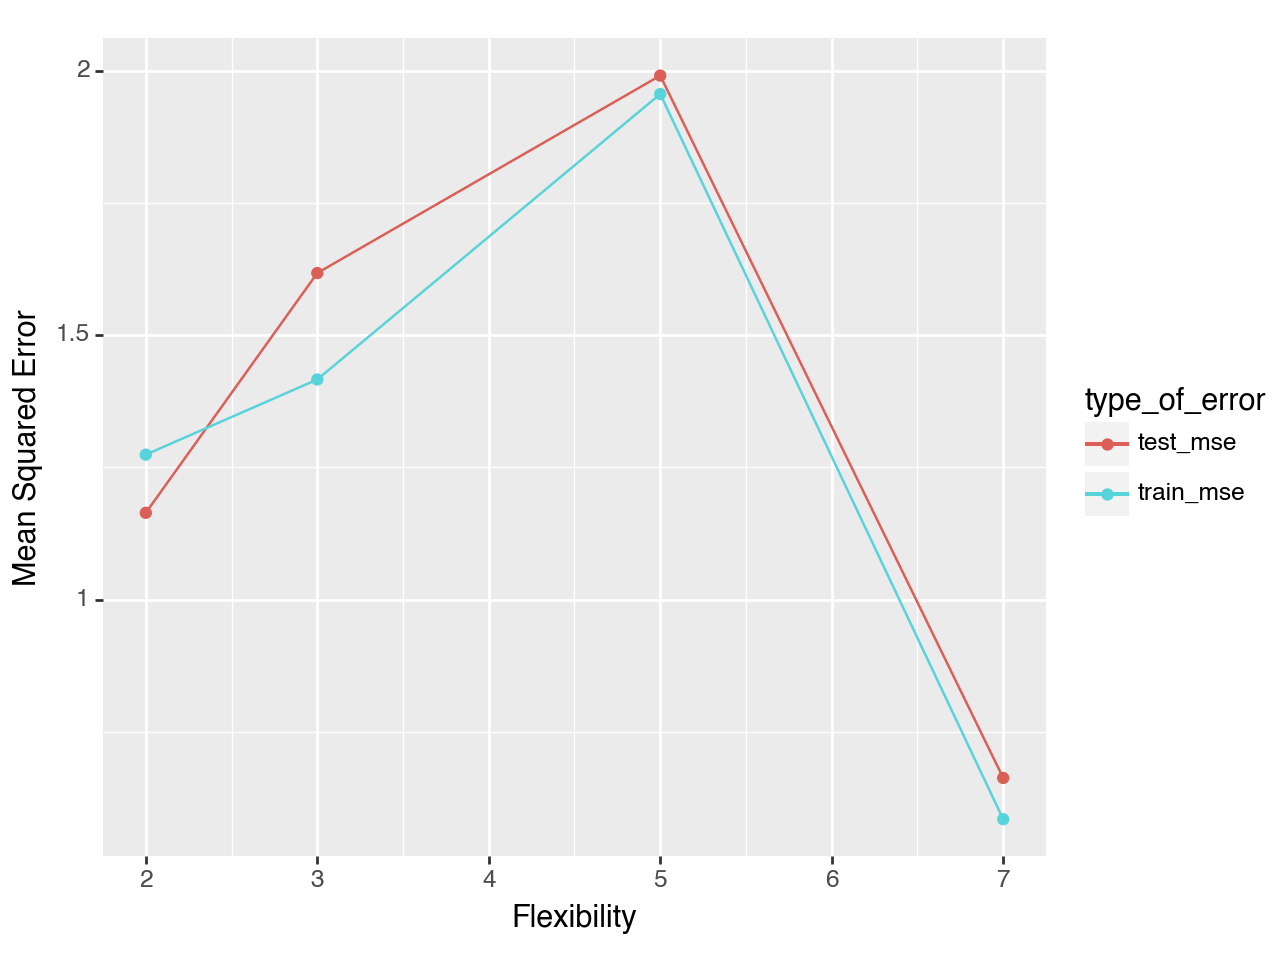

<Figure Size: (640 x 480)>

In [22]:
# Make plot showing training and test MSE for the four models
from plotnine import *

(ggplot(errors_long,
aes(
  x = "flexibility",
  y = "mse",
  color = "type_of_error",
  group = "type_of_error"
))
+ geom_point()
+ geom_line()
+ labs(x="Flexibility", y="Mean Squared Error")
)


Based on the calculated mean squared errors and the plot visualizing them, it seemed **the fourth model (the one that had every possible predictor variable) performed the best** as it has both the lowest training MSE and the lowest test MSE. It seems that the complexity of the model improved its performance, though it's worth noting that that is not always the case in machine learning. In fact, even in this case, we can see that the training and test MSEs actually increase with complexity until we get to the fourth and final model, proving that more complexity doesn't always mean a better fit.
